In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

import random

In [3]:
circ = QuantumCircuit(40, 40)

# Hadamard layer
circ.h(range(40))

# CNOT and T gates
qubit_indices = [i for i in range(40)]
for i in range(10):
    control, target, t = random.sample(qubit_indices, 3)
    circ.cx(control, target)
    circ.t(t)
circ.measure(range(40), range(40))

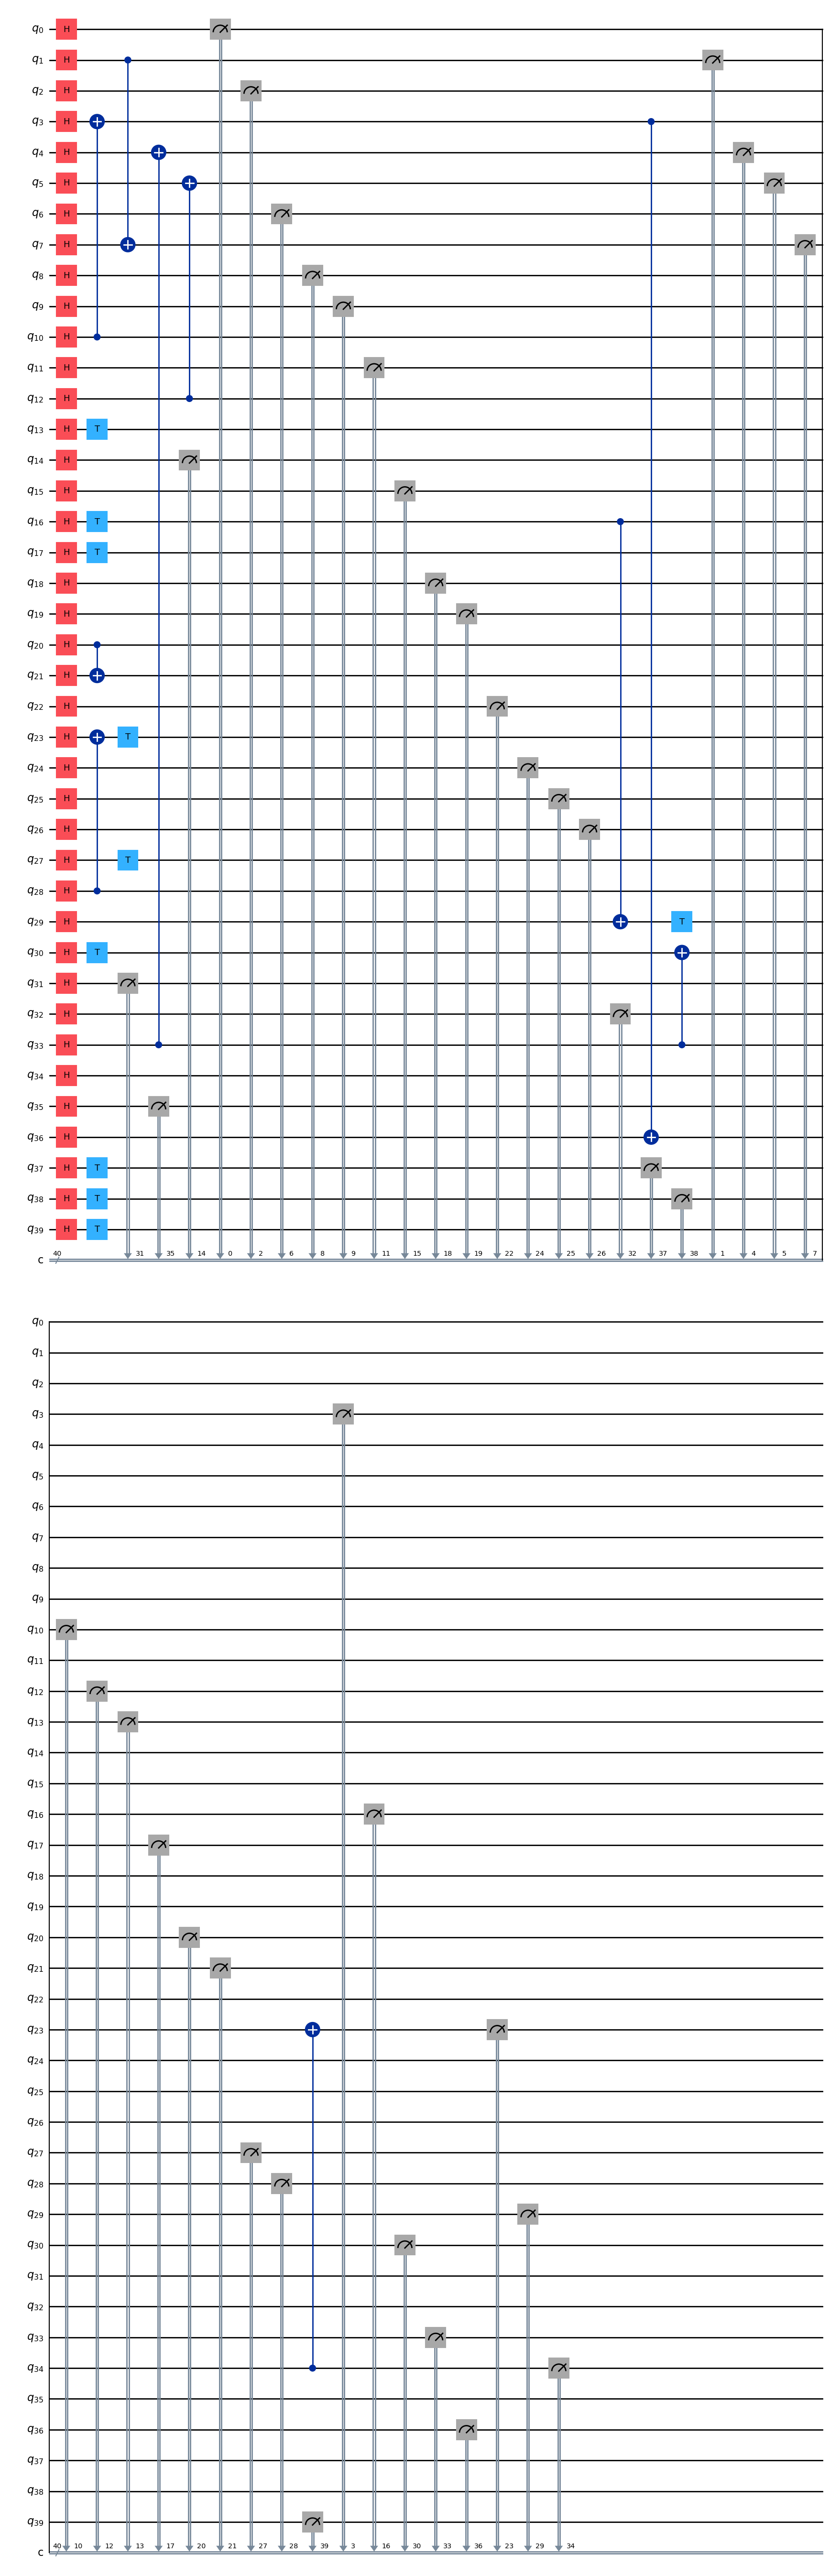

In [4]:
circ.draw('mpl')

In [6]:
# stabilizer method simulator
extended_stabilizer_simulator = AerSimulator(method='extended_stabilizer')

# Transpile circuit for backend
tcirc = transpile(circ, extended_stabilizer_simulator)

extended_stabilizer_result = extended_stabilizer_simulator.run(tcirc, shots=1).result()
print('This succeeded?: {}'.format(extended_stabilizer_result.success))

This succeeded?: True


In [7]:
small_circ = QuantumCircuit(2, 2)
small_circ.h(0)
small_circ.cx(0, 1)
small_circ.t(0)
small_circ.measure([0, 1], [0, 1])
# This circuit should give 00 or 11 with equal probability...
expected_results ={'00': 50, '11': 50}

In [8]:
tsmall_circ = transpile(small_circ, extended_stabilizer_simulator)
result = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100).result()
counts = result.get_counts(0)
print('100 shots in {}s'.format(result.time_taken))

100 shots in 1.69140625s


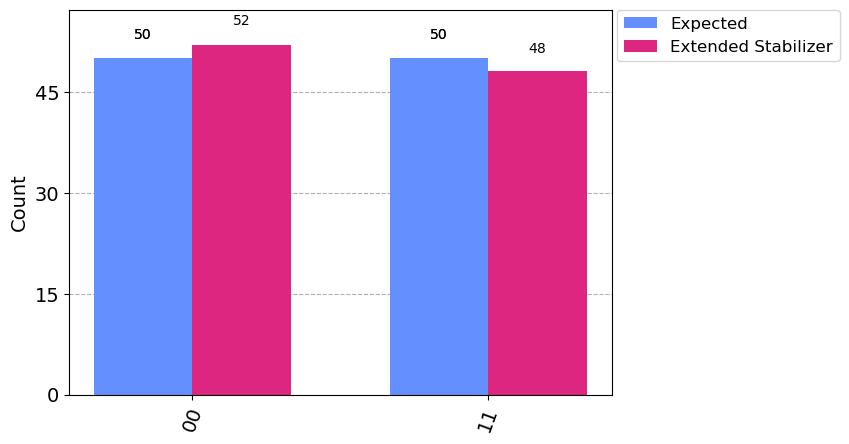

In [9]:
plot_histogram([expected_results, counts],
               legend=['Expected', 'Extended Stabilizer'])

100 shots in 4.287167072296143s


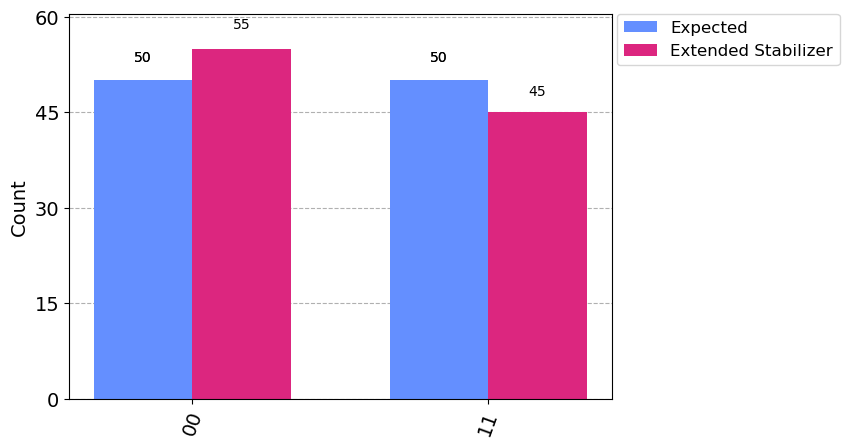

In [10]:
# Add runtime options for extended stabilizer simulator
opts = {'extended_stabilizer_approximation_error': 0.03}

reduced_error = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100, **opts).result()

reduced_error_counts = reduced_error.get_counts(0)
print('100 shots in {}s'.format(reduced_error.time_taken))
plot_histogram([expected_results, reduced_error_counts],
               legend=['Expected', 'Extended Stabilizer'])

In [11]:
print("The circuit above, with 100 shots at precision 0.03 "
      "and default mixing time, needed {}s".format(int(reduced_error.time_taken)))

opts = {
    'extended_stabilizer_approximation_error': 0.03,
    'extended_stabilizer_mixing_time': 100
}

optimized = extended_stabilizer_simulator.run(
    tsmall_circ, shots=100, **opts).result()

print('Dialing down the mixing time, we completed in just {}s'.format(optimized.time_taken))

The circuit above, with 100 shots at precision 0.03 and default mixing time, needed 4s
Dialing down the mixing time, we completed in just 4.283735036849976s


In [12]:
# We set these options here only to make the example run more quickly.
opts = {'extended_stabilizer_mixing_time': 100}

multishot = extended_stabilizer_simulator.run(
    tcirc, shots=100, **opts).result()
print("100 shots took {} s".format(multishot.time_taken))

100 shots took 42.52650213241577 s
